# rewardの設定とrandom policy
プラントのセンサーデータのシミュレータ `EnvSensor` に対して、行動後に得られる報酬（reward）を次のように設計しましょう。
* reward = 1 : 125℃以上130℃以下に温度が抑えられている場合
* reward = -1 : 上記以外

また、120回行動した時点でそのepisodeは終了することにします。

In [1]:
# 必要なmoduleのimport
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from environment import EnvSensor
from reward import Reward
from policy import RandomPolicy
from utils import stop_episode, plot_demo

## A. 報酬の実装

`reward.py` に上記で設計した報酬を実際に計算するクラス `Reward` を実装しています。このクラスは `get_reward` メソッドをもち `state` 引数に現在のプラント内の温度（状態）を渡すと、報酬を返す仕組みになっています。

In [2]:
# 報酬instanceのbuild
rew = Reward()

In [3]:
rew.get_reward(state = 120.0)

-1

In [4]:
rew.get_reward(state = 125.0)

1

## B. episodeの終了規則

episodeが終了したかは `utils.py` に実装している`stop_episode`メソッドで評価することにします。このメソッドは`time`引数に120を渡すと、episodeが終了したことを表す値`1`を返す簡単なものです。

In [5]:
stop_episode(time = 25)

0

In [6]:
stop_episode(time = 120)

1

## C. ランダム方策による実験

ランダム方策は、環境の状態に依存することなく、行動を全ての候補から同様に確からしく選択する方策のことです。ランダム方策を用いて、強化学習の流れを簡単に確認しておきましょう。

In [17]:
# ランダム方策のクラスの使い方
pol = RandomPolicy()
pol.get_action(state = 120.0)

1

In [18]:
# 諸設定
n_episode = 1000
n_actions = 120
env = EnvSensor()
rew = Reward()
pol = RandomPolicy()
reward_each_episode = []
cumulative_rewards = []

In [19]:
# ランダム方策の学習
for i in tqdm(range(n_episode)):
    state = env.reset()
    for j in range(1, n_actions + 1):
        action = pol.get_action(state = state)
        state = env.get_state(action = action)
        reward = rew.get_reward(state = state)
        reward_each_episode.append(reward)    # rewardのログを保存
        if stop_episode(time = j) == 1:
            #print("episode " + str(i) + " : " + str(j) + \
            #      " actions and final reward " + str(reward))
            cumulative_rewards.append(np.sum(reward_each_episode))    # episodeの累積報酬のログを取る。
            reward_each_episode = []    # rewardのログを初期化
            break
print("End of all episodes")


End of all episodes


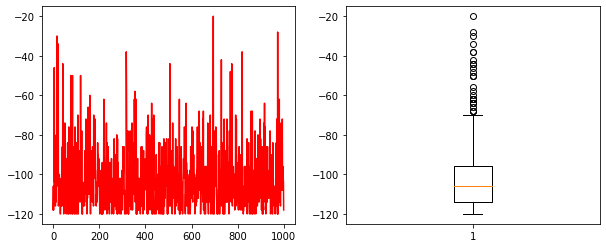

In [20]:
# 結果の確認
episode_index = [i for i in range(n_episode)]
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.plot(episode_index, cumulative_rewards, color = "red")
plt.subplot(1, 2, 2)
plt.boxplot(cumulative_rewards)
plt.show()

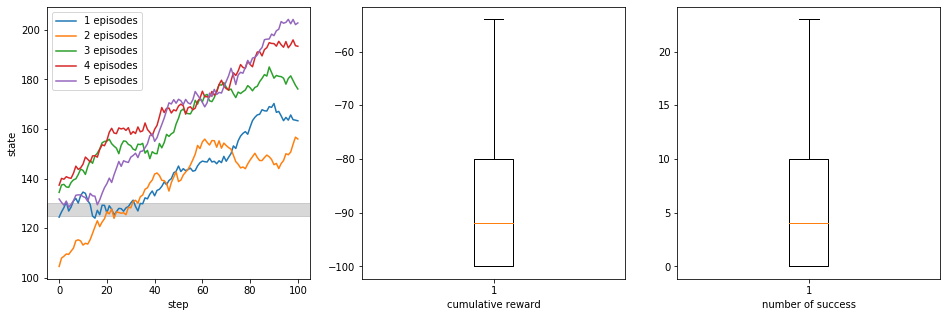

In [21]:
plot_demo(env = env, pol = pol, n_episodes = 5, steps_per_episode = 100)